## SGD Algorithm

In [174]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as pylab
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import math

In [383]:
def plot_line_with_optimize_steps(x,y,opt_points_x, opt_points_y,fname_to_save, title, annotate=True):
    epsilon = 1.0
    epsilon_x = 0.01
    
    max_alpha = 1.0
    min_alpha = 0.2
    
    n_steps = len(opt_points_x)
    
    pylab.plot(x,y)
    pylab.xlabel(r'$\theta$',fontsize=18)
    pylab.ylabel(r'$y$',fontsize=18)
    pylab.title(title,fontsize=18)
    
    for idx, (p_x, p_y) in enumerate(zip(opt_points_x, opt_points_y)):        
        alpha = min_alpha + idx*(max_alpha - min_alpha) / n_steps
        pylab.scatter(p_x, p_y,color='r', alpha=alpha)
        if annotate:
            pylab.annotate('t='+str(idx),xy=(0,0), xytext=(p_x,p_y+1),fontsize=18)    
    
    pylab.savefig(fname_to_save)
    pylab.show()
    
    
    

In [384]:
tf.reset_default_graph()
session = tf.InteractiveSession()

tf_x_ph = tf.placeholder(shape=[100], dtype=tf.float32, name='x_placeholder')

with tf.variable_scope('opt'):
    tf_x = tf.get_variable('x',initializer=tf.constant(-5.0, shape=None, dtype=tf.float32))

tf_y = tf_x ** 2
tf_y_ph = tf_x_ph ** 2


-4.0
-3.2
-2.56


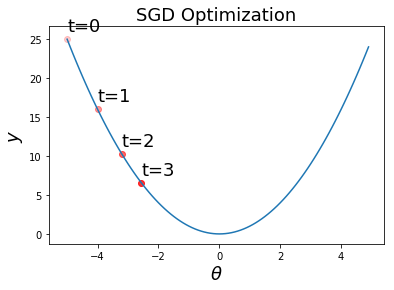

In [389]:

tf_optimize_y = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(tf_y)
#tf_assign_x = tf.assign(tf_x, )
session.run(tf.global_variables_initializer())
#x = -5.0

opt_points_x, opt_points_y = [],[]
opt_points_x.append(-5.0)
opt_points_y.append(25.0)
for step in range(3):
    session.run(tf_optimize_y)
    x, y = session.run([tf_x, tf_y])    
    opt_points_x.append(x)
    opt_points_y.append(y)
    print(x)
        
range_x = np.arange(-5.0,5.0,0.1)
range_y = session.run(tf_y_ph,feed_dict={tf_x_ph:range_x})

plot_line_with_optimize_steps(range_x,range_y,np.asarray(opt_points_x),np.asarray(opt_points_y),'sgd.png','SGD Optimization')

## Momentum Optimizer

-4.0
-2.3
-0.31


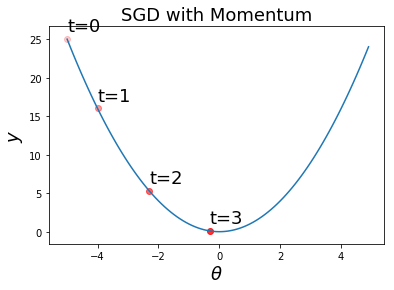

In [386]:
tf_optimize_y = tf.train.MomentumOptimizer(learning_rate=0.1, momentum=0.9).minimize(tf_y)

with tf.variable_scope('opt',reuse=True):
    tf_reinit_x = tf.assign(tf.get_variable('x'),-5.0)
    session.run(tf_reinit_x)

    session.run(tf.global_variables_initializer())

opt_points_x, opt_points_y = [],[]
opt_points_x.append(-5.0)
opt_points_y.append(25.0)
for step in range(3):
    
    session.run(tf_optimize_y)
    x, y = session.run([tf_x, tf_y])    
    opt_points_x.append(x)
    opt_points_y.append(y)
    print(x)

range_x = np.arange(-5.0,5.0,0.1)
range_y = session.run(tf_y_ph,feed_dict={tf_x_ph:range_x})

plot_line_with_optimize_steps(range_x,range_y,np.asarray(opt_points_x),np.asarray(opt_points_y),'momentum_sgd.png','SGD with Momentum')

## Problem with the Momentum Optimizer

-2.209
0.7447
3.25409
4.86172
5.33625
4.69607
3.1807
1.18072
-0.855401
-2.51683


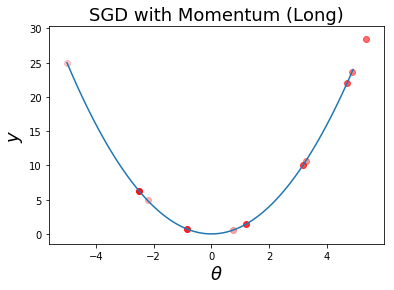

In [387]:
with tf.variable_scope('opt',reuse=True):
    tf_reinit_x = tf.assign(tf.get_variable('x'),-5.0)
    session.run(tf_reinit_x)

opt_points_x, opt_points_y = [],[]
opt_points_x.append(-5.0)
opt_points_y.append(25.0)
for step in range(10):
    
    session.run(tf_optimize_y)
    x, y = session.run([tf_x, tf_y])  
    opt_points_x.append(x)
    opt_points_y.append(y)
    print(x)
    
range_x = np.arange(-5.0,5.0,0.1)
range_y = session.run(tf_y_ph,feed_dict={tf_x_ph:range_x})

plot_line_with_optimize_steps(range_x,range_y,np.asarray(opt_points_x),np.asarray(opt_points_y),
                              'sgd_momentum_longer.png','SGD with Momentum (Long)', False)

## Nestrov's Accelerated Gradient with Tensorflow

-3.1
-1.112
0.54176
1.62411
2.07859
1.99009
1.52835
0.890233
0.25274
-0.256804


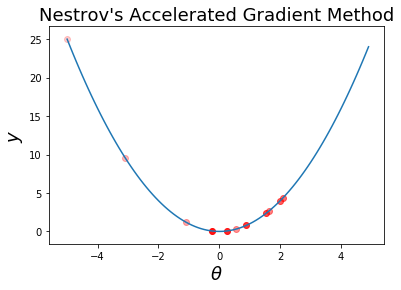

In [390]:
tf_optimize_y = tf.train.MomentumOptimizer(learning_rate=0.1, momentum=0.9, use_nesterov=True).minimize(tf_y)

with tf.variable_scope('opt',reuse=True):
    tf_reinit_x = tf.assign(tf.get_variable('x'),-5.0)
    session.run(tf_reinit_x)

    session.run(tf.global_variables_initializer())

opt_points_x, opt_points_y = [],[]
opt_points_x.append(-5.0)
opt_points_y.append(25.0)
for step in range(10):
    
    session.run(tf_optimize_y)
    x, y = session.run([tf_x, tf_y])    
    opt_points_x.append(x)
    opt_points_y.append(y)
    print(x)

range_x = np.arange(-5.0,5.0,0.1)
range_y = session.run(tf_y_ph,feed_dict={tf_x_ph:range_x})

plot_line_with_optimize_steps(range_x,range_y,np.asarray(opt_points_x),np.asarray(opt_points_y),
                             'nestrov.png','Nestrov\'s Accelerated Gradient Method', False)

## AdaGrad Learning rate for each Parameter

In [374]:
sigma_1 = 1.0
sigma_2 = 2.0
mu_1 = 0.5
mu_2 = 0.0

start_x, start_y = 0.4,0.5

tf.reset_default_graph()
session = tf.InteractiveSession()

tf_x_ph = tf.placeholder(shape=[100], dtype=tf.float32, name='x_placeholder')
tf_y_ph = tf.placeholder(shape=[100], dtype=tf.float32, name='x_placeholder')

with tf.variable_scope('opt'):
    tf_x = tf.get_variable('x',initializer=tf.constant(start_x, shape=None, dtype=tf.float32))
    tf_y = tf.get_variable('y',initializer=tf.constant(start_y, shape=None, dtype=tf.float32))
with tf.variable_scope('opt',reuse=True):
    tf_reinit_x = tf.assign(tf.get_variable('x'),start_x)
    tf_reinit_y = tf.assign(tf.get_variable('y'),start_y)
    
tf_z = (2.0/np.sqrt((2*math.pi*sigma_1**2)**2))*(tf.exp(-((tf_x-mu_1)**2 + (tf_y-mu_1)**2)/(sigma_1/2.0)**2)) - \
(1.0/np.sqrt((2*math.pi*sigma_2**2)**2))*(tf.exp(-((tf_x-mu_2)**2 + (tf_y-mu_2)**2)/sigma_2**2))

# make it curved towards ends
tf_z += 0.05*(tf_x**2 + tf_x*tf_y + tf_y**2)

def get_z(X,Y):
    Z = (2.0/np.sqrt((2*math.pi*sigma_1**2)**2))*(np.exp(-((X-mu_1)**2 + (Y-mu_1)**2)/(sigma_1/2.0)**2)) - \
(1.0/np.sqrt((2*math.pi*sigma_2**2)**2))*(np.exp(-((X-mu_2)**2 + (Y-mu_2)**2)/sigma_2**2)) + \
0.05*(X**2 + X*Y + Y**2)
    return Z

In [369]:
tf_ada_optimize_z = tf.train.AdagradOptimizer(learning_rate=0.1).minimize(tf_z)
tf_mom_optimize_z = tf.train.MomentumOptimizer(learning_rate=0.1, momentum=0.9, use_nesterov=True).minimize(tf_z)

In [370]:
#x^2 + xy + y^2

with tf.variable_scope('opt',reuse=True):
#    tf_reinit_x = tf.assign(tf.get_variable('x'),-5.0)
#    session.run(tf_reinit_x)
    session.run(tf.global_variables_initializer())

opt_ada_points_x, opt_ada_points_y, opt_ada_points_z = [],[],[]
opt_ada_points_x.append(start_x)
opt_ada_points_y.append(start_y)
opt_ada_points_z.append(get_z(start_x,start_y))

print('Adagrad Optimization')
for step in range(10):
    session.run(tf_ada_optimize_z)
    x, y, z = session.run([tf_x, tf_y, tf_z])    
    opt_ada_points_x.append(x)
    opt_ada_points_y.append(y)
    opt_ada_points_z.append(z)
    print('X:',x,', Y:',y,'=> Z:',z)

session.run([tf_reinit_x, tf_reinit_y])

opt_mom_points_x, opt_mom_points_y, opt_mom_points_z = [],[],[]
opt_mom_points_x.append(start_x)
opt_mom_points_y.append(start_y)
opt_mom_points_z.append(get_z(start_x,start_y))

print('Momentum Optimization')
for step in range(10):
    session.run(tf_mom_optimize_z)
    x, y, z = session.run([tf_x, tf_y, tf_z])    
    opt_mom_points_x.append(x)
    opt_mom_points_y.append(y)
    opt_mom_points_z.append(z)
    print('X:',x,', Y:',y,'=> Z:',z)

range_x,range_y = np.arange(-2.0,3.0,0.5), np.arange(-2.0,2.0,0.5)
X_lowres, Y_lowres = np.meshgrid(range_x, range_y)
Z_lowres = get_z(X_lowres,Y_lowres)

range_x,range_y = np.arange(-2.0,3.0,0.1), np.arange(-2.0,2.0,0.1)
X_hires, Y_hires = np.meshgrid(range_x, range_y)
Z_hires = get_z(X_hires,Y_hires)

Adagrad Optimization
X: 0.32922 , Y: 0.475769 => Z: 0.270569
X: 0.258417 , Y: 0.439334 => Z: 0.229733
X: 0.194089 , Y: 0.392489 => Z: 0.184495
X: 0.138459 , Y: 0.341281 => Z: 0.141298
X: 0.0917005 , Y: 0.291568 => Z: 0.104472
X: 0.052928 , Y: 0.246494 => Z: 0.0753297
X: 0.0208292 , Y: 0.206927 => Z: 0.053128
X: -0.00590859 , Y: 0.172586 => Z: 0.0364209
X: -0.0284031 , Y: 0.142796 => Z: 0.0238187
X: -0.0475392 , Y: 0.116837 => Z: 0.014221
Momentum Optimization
X: 0.339799 , Y: 0.484994 => Z: 0.276321
X: 0.23201 , Y: 0.457929 => Z: 0.218381
X: 0.0677211 , Y: 0.415669 => Z: 0.118727
X: -0.131592 , Y: 0.361928 => Z: 0.0265012
X: -0.320653 , Y: 0.307718 => Z: -0.0143654
X: -0.482227 , Y: 0.258831 => Z: -0.0228629
X: -0.618269 , Y: 0.216059 => Z: -0.0194248
X: -0.731763 , Y: 0.179444 => Z: -0.0122178
X: -0.824561 , Y: 0.149032 => Z: -0.00424788
X: -0.898046 , Y: 0.124811 => Z: 0.00317477


In [371]:
pylab.clf()
fig = pylab.figure(figsize=(16, 7))
ax1 = fig.add_subplot(111,projection='3d')
ax1.plot_surface(X_hires, Y_hires, Z_hires, linewidth=1, cmap=cm.jet,
               antialiased=False)
ax1.set_xlabel(r'$\theta^1$',fontsize=18)
ax1.set_ylabel(r'$\theta^2$',fontsize=18)
pylab.title('3D Surface',fontsize=18)
pylab.savefig('3d_surface.png')

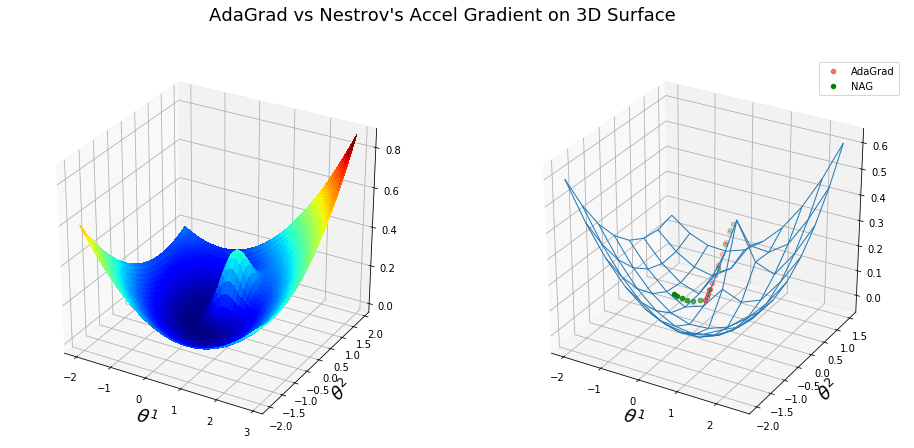

In [372]:
pylab.clf()
fig = pylab.figure(figsize=(16, 7))
ax1 = fig.add_subplot(121,projection='3d')
ax2 = fig.add_subplot(122,projection='3d')
ax1.plot_surface(X_hires, Y_hires, Z_hires, linewidth=1, cmap=cm.jet,
               antialiased=False)

ax2.plot_wireframe(X_lowres, Y_lowres, Z_lowres, linewidth=1)
for idx, (x,y,z) in enumerate(zip(opt_ada_points_x, opt_ada_points_y, opt_ada_points_z)):
    if idx != len(opt_ada_points_x)-1:
        ax2.scatter(x,y,z , color='r', alpha=(idx+2)/22.0)
    else:
        ax2.scatter(x,y,z , color='r', alpha=(idx+2)/22.0, label='AdaGrad')
for idx, (x,y,z) in enumerate(zip(opt_mom_points_x, opt_mom_points_y, opt_mom_points_z)):
    if idx != len(opt_mom_points_x)-1:
        ax2.scatter(x,y,z , color='g', alpha=(idx+2)/12.0)
    else:
        ax2.scatter(x,y,z , color='g', alpha=(idx+2)/12.0, label='NAG')

ax1.set_xlabel(r'$\theta^1$',fontsize=18)
ax1.set_ylabel(r'$\theta^2$',fontsize=18)
ax2.set_xlabel(r'$\theta^1$',fontsize=18)
ax2.set_ylabel(r'$\theta^2$',fontsize=18)
ax2.legend()
pylab.suptitle('AdaGrad vs Nestrov\'s Accel Gradient on 3D Surface',fontsize=18)

pylab.savefig('AdaGrad_3d.png')
pylab.show()

## RMSProp Optimizer

## Adam Optimizer: Why not both learning rate and momentum for each parameter

In [375]:
tf_ada_optimize_z = tf.train.AdagradOptimizer(learning_rate=0.1).minimize(tf_z)
tf_adam_optimize_z = tf.train.AdamOptimizer(learning_rate=0.1).minimize(tf_z)

In [379]:
session.run(tf.global_variables_initializer())
session.run([tf_reinit_x, tf_reinit_y])

opt_ada_points_x, opt_ada_points_y, opt_ada_points_z = [],[],[]
opt_ada_points_x.append(start_x)
opt_ada_points_y.append(start_y)
opt_ada_points_z.append(get_z(start_x,start_y))


print('Adagrad Optimization')
for step in range(10):
    session.run(tf_ada_optimize_z)
    x, y, z = session.run([tf_x, tf_y, tf_z])    
    opt_ada_points_x.append(x)
    opt_ada_points_y.append(y)
    opt_ada_points_z.append(z)
    print('X:',x,', Y:',y,'=> Z:',z)

session.run([tf_reinit_x, tf_reinit_y])

opt_adam_points_x, opt_adam_points_y, opt_adam_points_z = [],[],[]
opt_adam_points_x.append(start_x)
opt_adam_points_y.append(start_y)
opt_adam_points_z.append(get_z(start_x,start_y))

print('Adam Optimization')
for step in range(10):
    session.run(tf_adam_optimize_z)
    x, y, z = session.run([tf_x, tf_y, tf_z])    
    opt_adam_points_x.append(x)
    opt_adam_points_y.append(y)
    opt_adam_points_z.append(z)
    print('X:',x,', Y:',y,'=> Z:',z)

    
range_x,range_y = np.arange(-2.0,3.0,0.5), np.arange(-2.0,2.0,0.5)
X_lowres, Y_lowres = np.meshgrid(range_x, range_y)
Z_lowres = get_z(X_lowres,Y_lowres)


Adagrad Optimization
X: 0.32922 , Y: 0.475769 => Z: 0.270569
X: 0.258417 , Y: 0.439334 => Z: 0.229733
X: 0.194089 , Y: 0.392489 => Z: 0.184495
X: 0.138459 , Y: 0.341281 => Z: 0.141298
X: 0.0917005 , Y: 0.291568 => Z: 0.104472
X: 0.052928 , Y: 0.246494 => Z: 0.0753297
X: 0.0208292 , Y: 0.206927 => Z: 0.053128
X: -0.00590859 , Y: 0.172586 => Z: 0.0364209
X: -0.0284031 , Y: 0.142796 => Z: 0.0238187
X: -0.0475392 , Y: 0.116837 => Z: 0.014221
Adam Optimization
X: 0.3 , Y: 0.4 => Z: 0.241732
X: 0.200882 , Y: 0.309816 => Z: 0.164043
X: 0.101162 , Y: 0.216139 => Z: 0.0867645
X: 0.00163049 , Y: 0.119956 => Z: 0.0272255
X: -0.0949565 , Y: 0.0242053 => Z: -0.00809091
X: -0.18516 , Y: -0.0670243 => Z: -0.0233928
X: -0.266497 , Y: -0.150217 => Z: -0.026593
X: -0.337927 , Y: -0.223375 => Z: -0.0238442
X: -0.399387 , Y: -0.28578 => Z: -0.0186354
X: -0.451279 , Y: -0.337447 => Z: -0.0127463


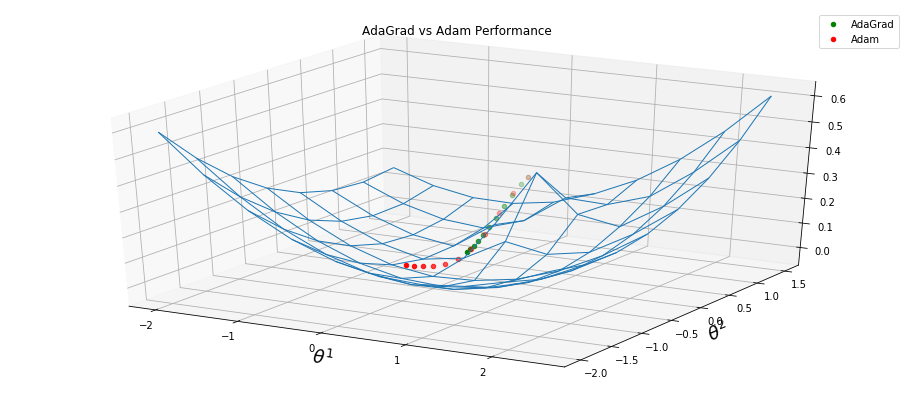

In [382]:
pylab.clf()
fig = pylab.figure(figsize=(16, 7))
ax1 = fig.add_subplot(111,projection='3d')

ax1.plot_wireframe(X_lowres, Y_lowres, Z_lowres, linewidth=1)
for idx, (x,y,z) in enumerate(zip(opt_ada_points_x, opt_ada_points_y, opt_ada_points_z)):
    if idx != len(opt_ada_points_x)-1:
        ax1.scatter(x,y,z , color='g', alpha=(idx+2)/12.0)
    else:
        ax1.scatter(x,y,z , color='g', alpha=(idx+2)/12.0, label='AdaGrad')
for idx, (x,y,z) in enumerate(zip(opt_adam_points_x, opt_adam_points_y, opt_adam_points_z)):
    if idx != len(opt_adam_points_x)-1:
        ax1.scatter(x,y,z , color='r', alpha=(idx+2)/12.0)
    else:
        ax1.scatter(x,y,z , color='r', alpha=(idx+2)/12.0, label='Adam')

ax1.set_xlabel(r'$\theta^1$',fontsize=18)
ax1.set_ylabel(r'$\theta^2$',fontsize=18)

pylab.title('AdaGrad vs Adam Performance')
pylab.legend()

pylab.savefig('AdaGradvsAdam_3d.png')
pylab.show()